In [100]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statistics
import pandas as pd

### a)
Uzyta funkcja to uniform() z modułu numpy.random

In [101]:
l15 = np.random.uniform(-1, 1, 15)
l120 = np.random.uniform(-1, 1, 120)
równomierny = np.linspace(-1, 1, 10)

### b)

In [102]:
wartości = [ "Średnia",
        "Mediana",
        "Moda",
        "Odchylenie standardowe",
        "Wariancja",
        "Skośność",
        "Kurtoza",
        "Pierwszy Kwantyl"]

def podaj_wartości_statystyczne(sequence):
     
    return {
        
        "Średnia": np.mean(sequence),
        "Mediana": np.median(sequence),
        "Moda": statistics.mode(sequence) if len(set(sequence)) < len(sequence) else "ND", # W przypadku tego zadania zwykle kazda wartość jest modą, bo sznasa na powtórzenie się liczb jest bardzo mała
        "Odchylenie standardowe": np.std(sequence, ddof=1),
        "Wariancja": np.var(sequence, ddof=1),
        "Skośność": stats.skew(sequence),
        "Kurtoza": stats.kurtosis(sequence),
        "Pierwszy Kwantyl": np.percentile(sequence, 25)
        
    }

In [103]:
statystyki_15 = podaj_wartości_statystyczne(l15)
statystyki_120 = podaj_wartości_statystyczne(l120)
stats_rów = podaj_wartości_statystyczne(równomierny)

In [104]:
tab = pd.DataFrame(columns=[wartości,list(statystyki_15.values()),list(statystyki_120.values()),list(stats_rów.values())])
tab

,Średnia,Mediana,Moda,Odchylenie standardowe,Wariancja,Skośność,Kurtoza,Pierwszy Kwantyl
,-0.014855628094043638,-0.1356328279257759,ND,0.615585767600838,0.37894583727271297,0.1457022656958669,-1.3672848776980864,-0.49926019873682514
,-0.09761550001536316,-0.10943456618666347,ND,0.5916527715910134,0.35005300213132784,0.23712696801217345,-1.1193884391454745,-0.6407479243359595
,-2.2204460492503132e-17,0.0,ND,0.6728111897994425,0.4526748971193415,-1.7077600100616195e-16,-1.2242424242424237,-0.5


### c)

In [105]:
def uniform_pdf(x, a, b):
    if a < x < b:
        return 1 / (b - a)
    else:
        return 0

a = -1 
b = 1  
x = np.linspace(a - 1, b + 1, 1000)
y = np.array([uniform_pdf(xi, a, b) for xi in x])


def nakreśl_wykres(sequence, title, równomierny):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,5))

    ax1.set_title(f"Histogram {title}")
    ax1.set_xlabel('wartość')
    ax1.set_ylabel('gęstość')
    ax1.set_ylim(0,3)
    ax1.set_xlim(-1,1)
    ax1.hist(sequence, bins=10, density=True, alpha=0.6, color='g',edgecolor='black')
    
    ax2.plot(x, y)
    ax2.set_title('Funkcja gęstości rozkładu równomiernego')
    ax2.set_xlabel('wartość')
    ax2.set_ylabel('gęstość')
    ax2.set_ylim(0,3)
    plt.show()

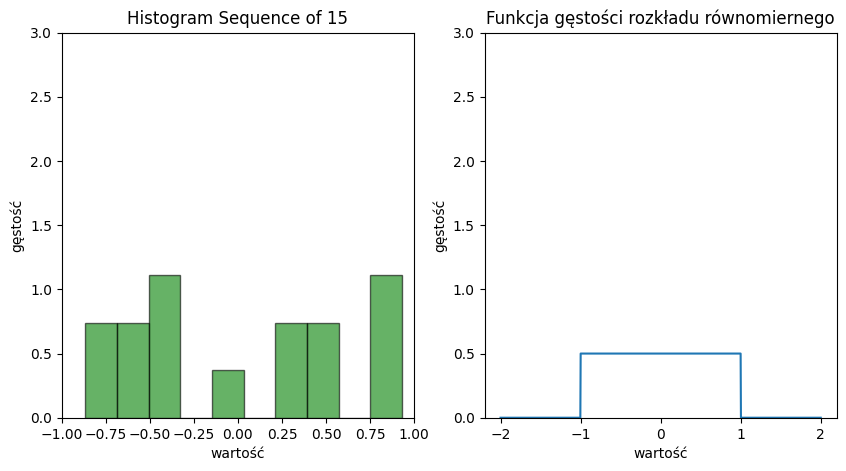

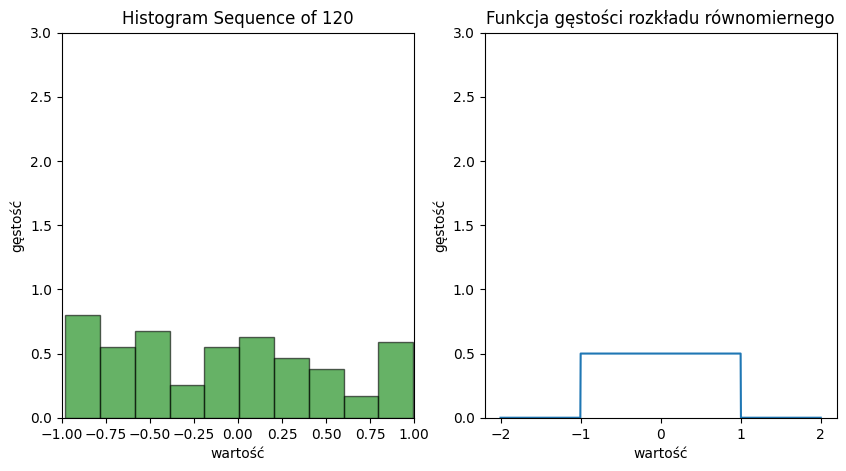

In [106]:
nakreśl_wykres(l15, "Sequence of 15",równomierny)
nakreśl_wykres(l120, "Sequence of 120",równomierny)

### d)

Obie próby są rozkładami równomienymi, ale łatwo zauwazyć, ze zgodnie z centralnym twierdzeniem granicznym ich średnie zbiegają do rozkłądu normalnego. Z tego powodu uzyjemy testu t-studenta.

Cechy testu t-studenta:
- uzywany do porównymania dwóch prób w rozkłądnie normalnym
- wykorzystywany zarówno do duych jak małych prób

Tezy:
> H0: Średnie z prób są równe 0. 

> HA: Średnie z prób nie są równe 0.

alfa = 5%


In [107]:
def t_test(sequence, expected_mean=0):
    sample_mean = np.mean(sequence)
    sample_std = np.std(sequence, ddof=1)
    n = len(sequence)
    
    
    t_stat = (sample_mean - expected_mean) / (sample_std / np.sqrt(n))
    p_value = 2 * stats.t.sf(np.abs(t_stat), n-1)
    
    return t_stat,p_value

t_stat_15, p_value_15 = t_test(l15)
t_stat_120, p_value_120 = t_test(l120)

In [108]:
print(f"dla próby 15:\nstatystyka t: {t_stat_15:.3f}\nwartość p: {p_value_15:.3f}\n")
print(f"dla próby 120:\nstatystyka t: {t_stat_120:.3f}\nwartość p: {p_value_120:.3f}")

dla próby 15:
statystyka t: -0.093
wartość p: 0.927

dla próby 120:
statystyka t: -1.807
wartość p: 0.073


Wartość krytyczna dla alfa = 5%, df = 14: 2,1448

Wartość krytyczna dla alfa = 5%, df = 119: 1,9801

In [109]:
v_15 = 2.1448
v_120 = 1.9801
alfa = 0.05

def decision(t,p,v,n):
    if abs(t) < abs(v) and p > alfa:
        print(f'Nie mamy podstaw by odrzucić hipotezę zerowową. Średnia z próby {n} jest równa 0')
    else:
        print(f'Odrzucamy hipotezę zerową. Zatem przyjmujemy hipotezę alternatywną. Średnia z próby {n} nie jest równa 0')

In [110]:
decision(t_stat_15,p_value_15,v_15,15)
decision(t_stat_120,p_value_120,v_120,120)

Nie mamy podstaw by odrzucić hipotezę zerowową. Średnia z próby 15 jest równa 0
Nie mamy podstaw by odrzucić hipotezę zerowową. Średnia z próby 120 jest równa 0
